In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data_dir = 'C:\\Users\\cindy\\Desktop\\Mini-Project-1-Safety-Analysis-of-Autonomous-Vehicles\\simulation_results\\'

### Import all the .csv data

##### 1.

In [24]:
scenarios = ['clear-night', 'clear-noon', 'clear-sunset', 'haze-noon', 'haze-sunset', 'rain-noon']
csvs = ['ctl', 'cvip', 'traj']

In [18]:
all_data = []
dfs = {}
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for scenario in scenarios:
            if scenario in folder:
                folder = scenario  
                break  

        for file in os.listdir(folder_path):
            if file.endswith('.csv'):
                file_path = os.path.join(folder_path, file)
                df = pd.read_csv(file_path)
                for csv_type in csvs:
                    if csv_type in file:
                        file = csv_type
                        break 
                all_data.append((folder, file, df))  
                key = f"{folder}_{file}"  
                dfs[key] = df 

for i, (folder, file, df) in enumerate(all_data):
    print(f"Data from folder '{folder}', file '{file}':\n", df.head(), "\n")
    print("="*50)

Data from folder 'clear-night', file 'ctl':
        ts  agent_id  throttle     steer  brake
0  542558         0       0.9 -0.003379    0.0
1  542559         0       0.9 -0.010903    0.0
2  542560         0       0.9 -0.009867    0.0
3  542561         0       0.9 -0.011255    0.0
4  542562         0       0.9  0.000766    0.0 

Data from folder 'clear-night', file 'cvip':
        ts  agent_id        cvip      cvip_x     cvip_y      cvip_z
0  542558         0  500.491189  198.767441 -95.832657 -499.819366
1  542559         0    5.595580  195.567444 -90.832657    0.100000
2  542560         0    5.592365  195.567444 -90.832657    0.095407
3  542561         0    5.589578  195.567444 -90.832657    0.084691
4  542562         0    5.587154  195.567444 -90.832657    0.069311 

Data from folder 'clear-night', file 'traj':
        ts  agent_id           x         y         z    v
0  542558         0  192.362411 -86.26268  0.539326  0.0
1  542559         0  192.362411 -86.26268  0.491906  0.0
2  5

In [27]:
# List the first 5 rows of the ctl.csv, cvip.csv, and traj.csv with the clear-night weather condition.
scenario = 'clear-night'

for file_type in csvs:
    key = f"{scenario}_{file_type}" 
    df = dfs.get(key)  
    if df is not None:
        # print(df['agent_id'].nunique())
        print(f"Data from '{key}':\n", df.head())

Data from 'clear-night_ctl':
        ts  agent_id  throttle     steer  brake
0  542558         0       0.9 -0.003379    0.0
1  542559         0       0.9 -0.010903    0.0
2  542560         0       0.9 -0.009867    0.0
3  542561         0       0.9 -0.011255    0.0
4  542562         0       0.9  0.000766    0.0
Data from 'clear-night_cvip':
        ts  agent_id        cvip      cvip_x     cvip_y      cvip_z
0  542558         0  500.491189  198.767441 -95.832657 -499.819366
1  542559         0    5.595580  195.567444 -90.832657    0.100000
2  542560         0    5.592365  195.567444 -90.832657    0.095407
3  542561         0    5.589578  195.567444 -90.832657    0.084691
4  542562         0    5.587154  195.567444 -90.832657    0.069311
Data from 'clear-night_traj':
        ts  agent_id           x         y         z    v
0  542558         0  192.362411 -86.26268  0.539326  0.0
1  542559         0  192.362411 -86.26268  0.491906  0.0
2  542560         0  192.362411 -86.26268  0.438374  

##### 2.

In [34]:
# The duration of the scene
duration = 0
for scenario in scenarios:
    for file_type in csvs:
        key = f"{scenario}_{file_type}" 
        df = dfs.get(key)  
        if df is not None:
            start_time = df['ts'].min() 
            end_time = df['ts'].max()  
            duration = end_time - start_time

    print(f"Scene '{scenario}'")
    print(f"The duration of the scene: {duration} seconds")
    print("="*50)

Scene 'clear-night'
The duration of the scene: 819 seconds
Scene 'clear-noon'
The duration of the scene: 751 seconds
Scene 'clear-sunset'
The duration of the scene: 756 seconds
Scene 'haze-noon'
The duration of the scene: 752 seconds
Scene 'haze-sunset'
The duration of the scene: 762 seconds
Scene 'rain-noon'
The duration of the scene: 401 seconds


In [63]:
# Mean and standard deviation of the values of the features
features = ['throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v']
results_df = pd.DataFrame(index=features)

for scenario in scenarios:
    mean_std_values = {}
    for file_type in csvs:
        key = f"{scenario}_{file_type}" 
        df = dfs.get(key) 
        if df is not None:
            for feature in features:
                if feature in df.columns:
                    mean_value = df[feature].mean()
                    std_value = df[feature].std()
                    mean_std_values[feature] = f"{mean_value:.3f} ± {std_value:.3f}"
    
    if mean_std_values:
        results_df[scenario] = pd.Series(mean_std_values)

results_df

,clear-night,clear-noon,clear-sunset,haze-noon,haze-sunset,rain-noon
throttle,0.608 ± 0.352,0.610 ± 0.281,0.610 ± 0.281,0.600 ± 0.299,0.604 ± 0.301,0.647 ± 0.271
steer,0.005 ± 0.051,0.001 ± 0.005,0.000 ± 0.005,0.001 ± 0.005,0.001 ± 0.005,-0.001 ± 0.003
brake,0.105 ± 0.307,0.059 ± 0.235,0.057 ± 0.232,0.056 ± 0.230,0.060 ± 0.238,0.040 ± 0.196
cvip,30.262 ± 30.247,19.423 ± 24.206,20.052 ± 24.636,19.723 ± 23.984,20.987 ± 24.899,7.047 ± 24.704
x,191.239 ± 1.208,192.919 ± 0.403,192.946 ± 0.401,192.940 ± 0.411,192.943 ± 0.409,192.633 ± 0.253
y,-32.738 ± 39.365,-31.380 ± 40.563,-31.216 ± 40.410,-31.761 ± 40.776,-31.525 ± 40.465,-63.876 ± 21.152
v,6.377 ± 3.016,6.936 ± 3.280,6.884 ± 3.315,6.924 ± 3.054,6.827 ± 3.078,6.351 ± 3.870


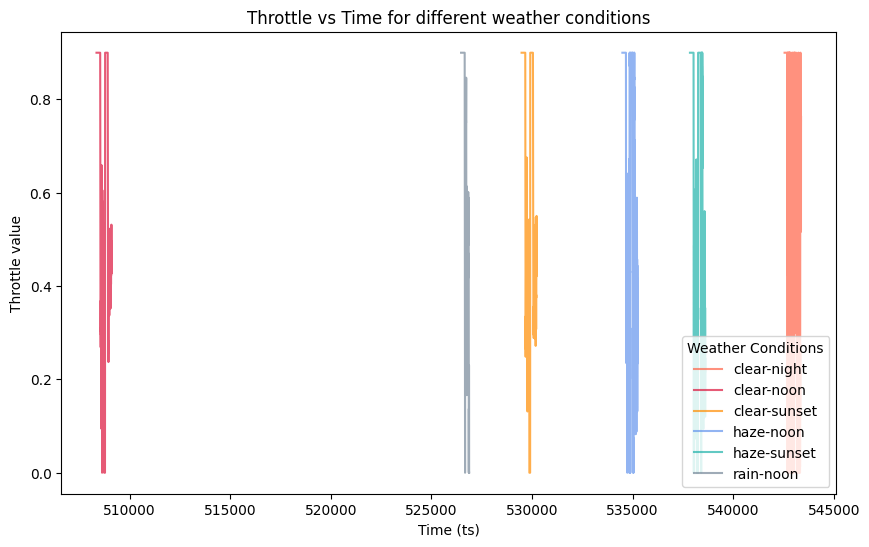

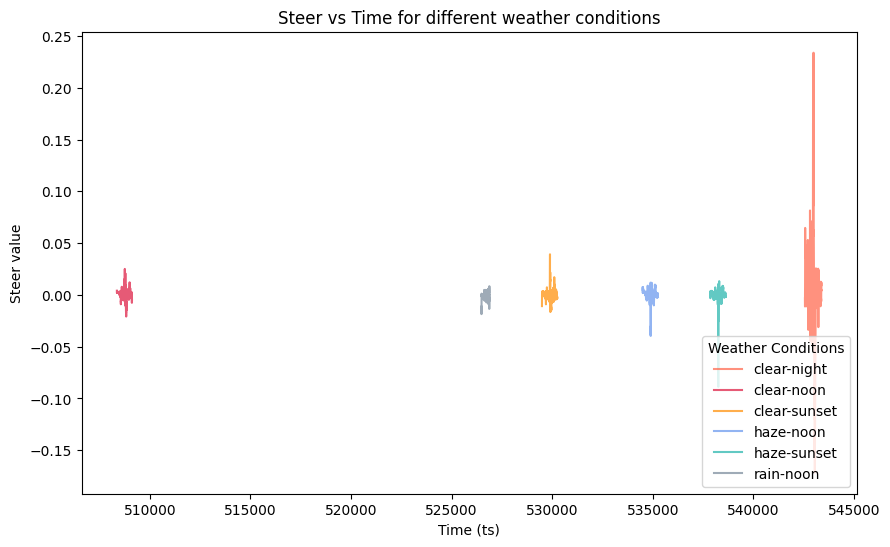

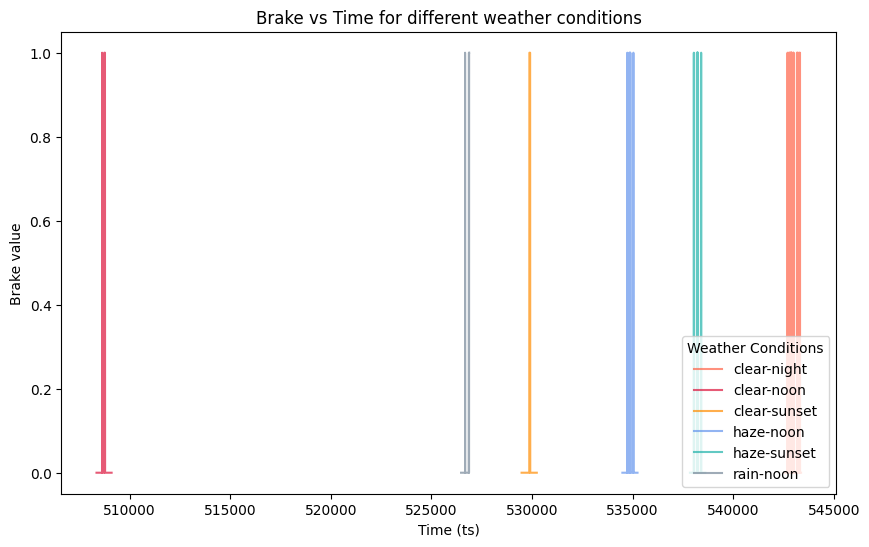

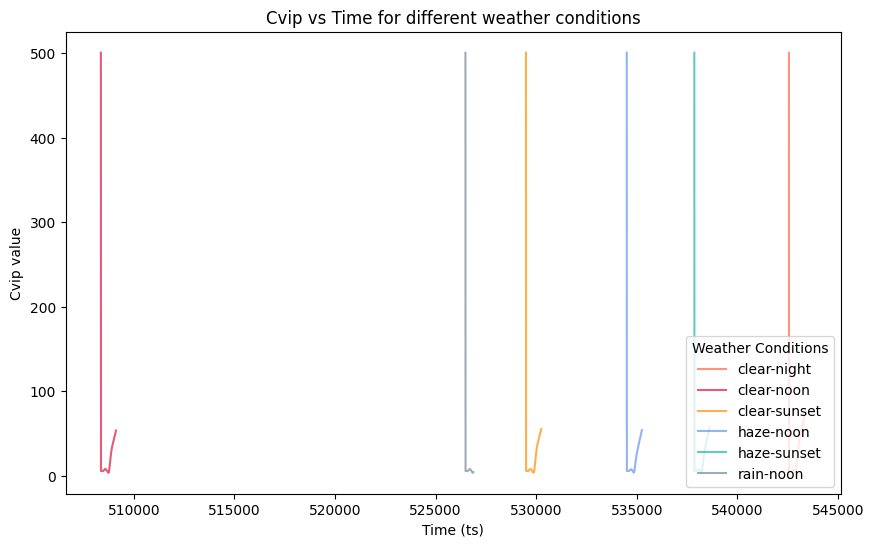

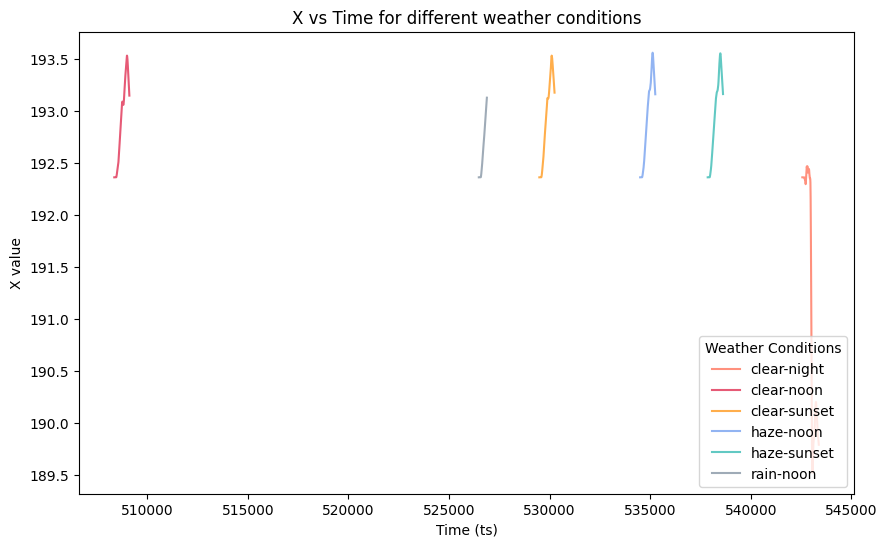

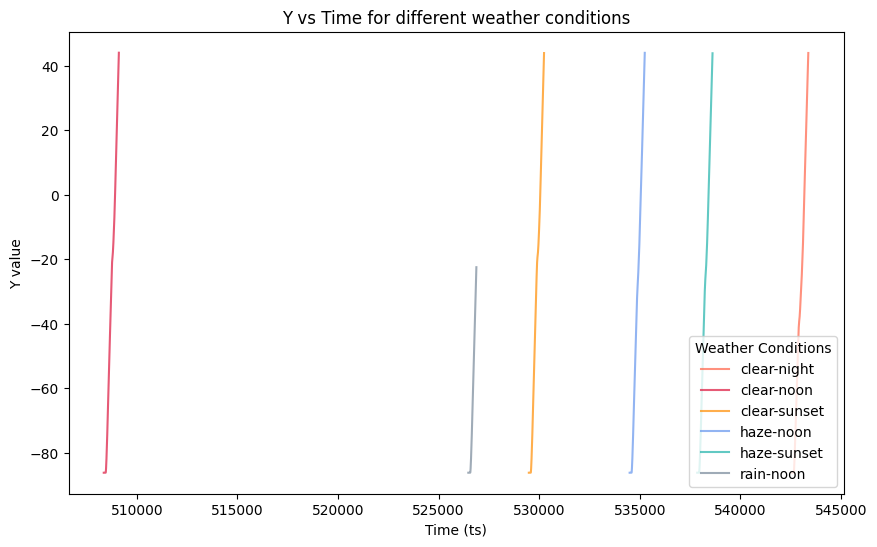

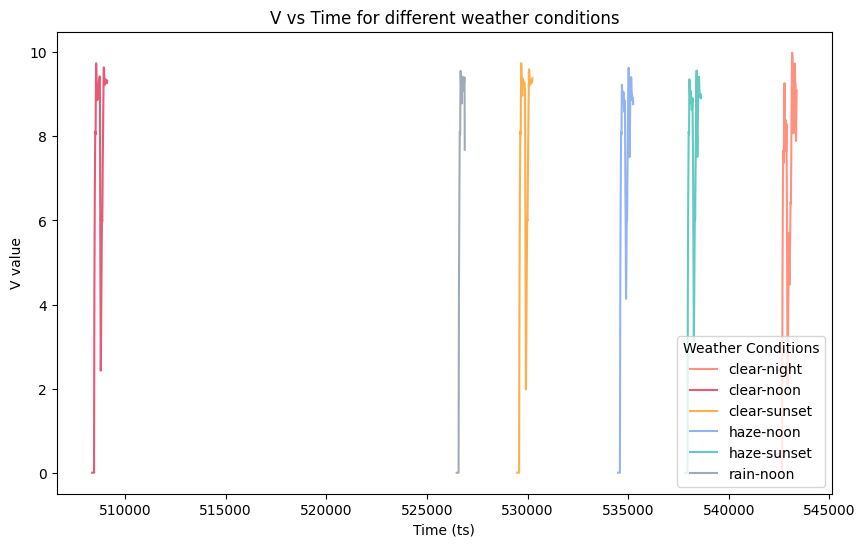

In [62]:
# colors, matching with scenarios
colors = ['tomato', 'crimson', 'darkorange', 'cornflowerblue', 'lightseagreen', 'lightslategrey']

for feature in features:
    plt.figure(figsize=(10, 6)) 
    plt.title(f"{feature.capitalize()} vs Time for different weather conditions")
    plt.xlabel("Time (ts)")
    plt.ylabel(f"{feature.capitalize()} value")

    for i, (scenario, color) in enumerate(zip(scenarios, colors)):
        df = None 
        for file_type in csvs:
            key = f"{scenario}_{file_type}"  
            df = dfs.get(key) 
            if df is not None and feature in df.columns:
                plt.plot(df['ts'], df[feature], label=scenario, color=color, alpha=0.7)

    plt.legend(title="Weather Conditions", loc='lower right')
    plt.show()